In [97]:
%pylab inline
from joblib import Parallel, delayed
import multiprocessing as mp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
import multiprocessing as mp
from multiprocessing import Pool, Value, Array
import time
from numba import njit

m_set = []

Populating the interactive namespace from numpy and matplotlib


/home/ubuntu/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [98]:
def mandelbrot_process(c, boundary, max_iterations=256):
    z = 0+0j
    i = 0
    while absolute(z) < absolute(boundary):
#         if i%20 == 0:
#             print('i:',i,'z:',z)
        if i == max_iterations:
            break
        z = z*z + c
        i += 1
    return i
    

In [133]:
# @njit()
def mandelbrot(start, end, step):
    def m_compute2(i, j):
        print(i)
        if mandelbrot_process(complex(i,j), 2):
                m_set.append((i,j))
    m_set = []
    m_compute = lambda i,j: m_set.append((i,j) if mandelbrot_process(complex(i,j), 2) else None)
    Parallel(n_jobs=-1)(delayed(m_set.append((i,j) if mandelbrot_process(complex(i,j), 2) else m_compute2(i,j)))(i, j)
                        for j in 
                        range(1,100,1)
                        for i in range(1,100,1))
#     for i in arange(start, end, step):
#         for j in arange(start, end, step):
#             iters = mandelbrot_process(complex(i,j), 2)
#             if int(iters):
#                 m_set.append((i,j, iters))
    return m_set

def run(a):
    m_set = mandelbrot(-2.0,2.0,0.1)

In [134]:
m_set = mandelbrot(-2.00,2.00,0.01)

TypeError: 'NoneType' object is not callable

In [101]:
# list(filter(lambda x: x[2] != 256, m_set))

In [102]:
labels = []
x_vals = []
y_vals = []

for point in m_set:
#     print(point)
    labels.append(point[2])
    x_vals.append(point[0])
    y_vals.append(point[1])

labels = np.array(labels)
x_vals = np.array(x_vals)
y_vals = np.array(y_vals)

In [124]:
# colors = cm.rainbow(colors)
c_array = {}

for i in range(len(labels)):
    c_array[labels[i]] = "#"+''.join([random.choice(['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']) for j in range(6)])

In [125]:
# c_array

No handles with labels found to put in legend.


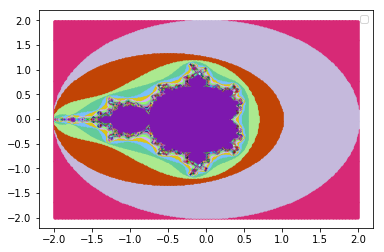

In [129]:
import numpy as np
from matplotlib import pyplot as plt

scatter_x = np.array([1,2,3,4,5])
scatter_y = np.array([5,4,3,2,1])
group = np.array([1,3,2,1,3])
cdict = {1: 'red', 2: 'blue', 3: 'green'}

fig, ax = plt.subplots()
for g in np.unique(labels):
    ix = np.where(labels == g)
    ax.scatter(x_vals[ix], y_vals[ix], c = c_array[g], s = 1)
ax.legend()
plt.show()